In [4]:
import pandas as pd
import numpy as np
import scipy
from math import sqrt
import matplotlib.pyplot as plt

In [5]:
#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [6]:
#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [7]:
#Cross validation
from sklearn.model_selection import train_test_split

In [8]:
data = pd.read_csv("/Users/tobiadelokun/Documents/Ubiqum/Python/Credit_One_Credit_Analysis/Data/Cleaned_Data.csv", header = 0)

In [9]:
data.describe()

,ID,Limit,Age,Status Sep,Status Aug,Status Jul,Status Jun,Status May,Status Apr,Bill Sep,...,Paid Apr,Default,Male,_GradSchl,_HighSchl,_Others,_Uni,_Married,_Others.1,_Single
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,...,5215.502567,0.221200,0.396267,0.352833,0.163900,0.015600,0.467667,0.455300,0.012567,0.532133
std,8660.398374,129747.661567,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,...,17777.465775,0.415062,0.489129,0.477859,0.370191,0.123924,0.498962,0.498006,0.111396,0.498975
min,1.000000,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,...,117.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15000.500000,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,...,1500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,22500.250000,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,...,4000.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,30000.000000,1000000.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,...,528666.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
data.drop(["ID"], axis = 1, inplace = True)

In [11]:
## DATA PARTITION 

# Feature selection
y = data.Default
x_data = data.drop(["Default"], axis = 1)

In [12]:
#Normalization
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [13]:
#LOGISTIC REGRESSION

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 42)

In [14]:
from sklearn.model_selection import GridSearchCV
param_grid = {"C": np.logspace(-3,3,7), "penalty" : ["l1","l2"]}

logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg,param_grid,cv = 10)
logreg_cv.fit(x_train,y_train)  

/Users/tobiadelokun/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Users/tobiadelokun/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Users/tobiadelokun/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitF

/Users/tobiadelokun/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/tobiadelokun/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/

/Users/tobiadelokun/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/tobiadelokun/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Users/tobiadelokun/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: Convergence

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [15]:
print("tuned hyperparameters: (best parameters): ", logreg_cv.best_params_)
print("accuracy: ", logreg_cv.best_score_)

tuned hyperparameters: (best parameters):  {'C': 10.0, 'penalty': 'l2'}
accuracy:  0.8115714285714286


In [16]:
logreg2 = LogisticRegression(C = 10, penalty="l2")
logreg2.fit(x_train,y_train)
print("score: ", logreg2.score(x_test,y_test))

score:  0.81


/Users/tobiadelokun/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


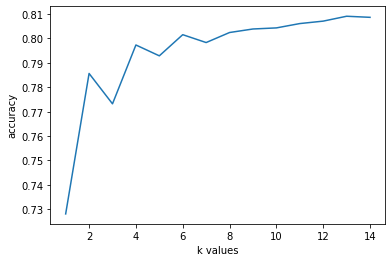

In [17]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
score_list = []
for each in range(1,15):
    knn2 =  KNeighborsClassifier(n_neighbors= each)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))
    
plt.plot(range(1,15),score_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()

In [18]:
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)

In [19]:
print(prediction)

[0 0 0 ... 0 0 0]


In [20]:
print("{}nn score: {}".format(4,knn.score(x_test,y_test)))

4nn score: 0.7973333333333333


In [ ]:
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV

grid = {"n_neighbors" :np.arange(1,50)}
knn = KNeighborsClassifier()

knn_cv = GridSearchCV(knn, grid , cv = 10) # GridSearchCV
knn_cv.fit(x,y)

In [82]:
print("tuned hyperparameter K:  ",knn_cv.best_params_)
print("tuned parametreye gore en iyi accuracy (best score): ",knn_cv.best_score_)

tuned hyperparameter K:   {'n_neighbors': 23}
tuned parametreye gore en iyi accuracy (best score):  0.8105666666666667


In [85]:
#SVC

from sklearn.svm import SVC

svm = SVC(random_state = 1)
svm.fit(x_train,y_train)



SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [86]:
print("Accuracy of svm algo: ",svm.score(x_test,y_test))

Accuracy of svm algo:  0.8087777777777778


In [87]:
#Naive Boyes

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [88]:
print("Accuracy of Naive Bayes Algo: ", nb.score(x_test,y_test))

Accuracy of Naive Bayes Algo:  0.5842222222222222


In [89]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [90]:
print("Accuracy of Decision Tree Algo: ", dt.score(x_test,y_test))

Accuracy of Decision Tree Algo:  0.7262222222222222


In [91]:
#Random forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100, random_state = 1)
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
print("Accuracy of Random Forest Algo: ", rf.score(x_test,y_test))

In [93]:
#Random forest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100, random_state = 1)
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [94]:
print("Accuracy of Random Forest Algo: ", rf.score(x_test,y_test))

Accuracy of Random Forest Algo:  0.8128888888888889


In [95]:
y_pred = rf.predict(x_test)
y_true = y_test

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true,y_pred)

In [96]:
print(cm)

[[6605  435]
 [1249  711]]


<function matplotlib.pyplot.show(*args, **kw)>

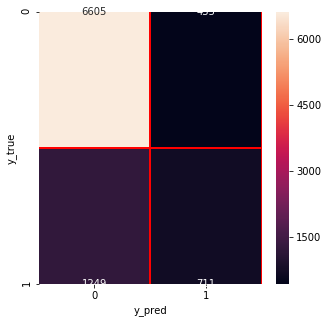

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm,annot = True, linewidths = 0.5, linecolor = "red", fmt = ".0f",ax = ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show